# Machine Learning Model Building Pipeline : Data Analysis

## House Prices dataset: Data Analysis

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

# # to display all the columns of the dataframe on
pd.pandas.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('houseprice.csv')

print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### We will analyse the dataset ot identify:
1. Missing values
2. Numerical variables
3. Distribution of the numerical variables
4. outliers
5. Categorical variables
6. Cardinality of the categorical varaibles
7. Potential relationship between the varaibles and the tager: SalePrice

## Missing values

In [3]:
# make a list of the variables that contain missing values

vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]
data[vars_with_na].isnull().mean() * 100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

## Realtionship between the values being missing and Sale Price

Let's evaluate the price of the house in those observations where the information is missing, for each variable.

In [4]:
def analyse_na_value(df, var):
    df = df.copy()
    
    # let's make a avariable that indicates 1 if he ovservation was missing or zero otherwise
    df[var] = np.where(df[var].isnull(), 1 , 0)
    df.groupby(var)['SalePrice'].median().plot.bar()
    
    plt.title(var)
    plt.show()

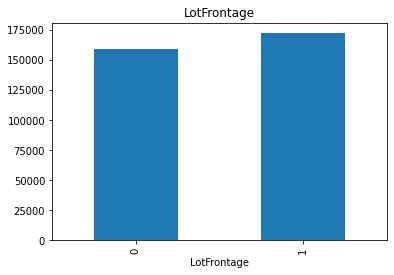

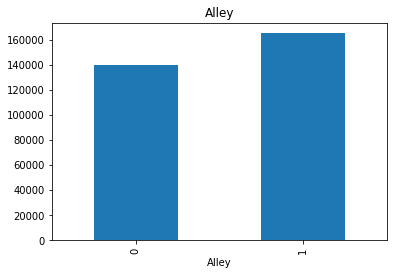

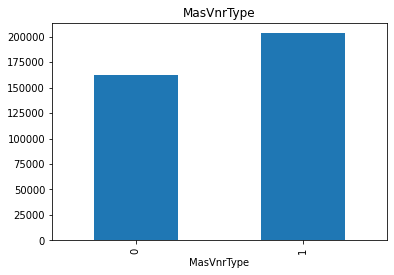

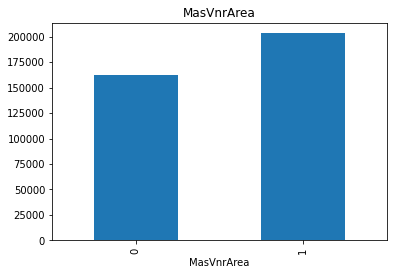

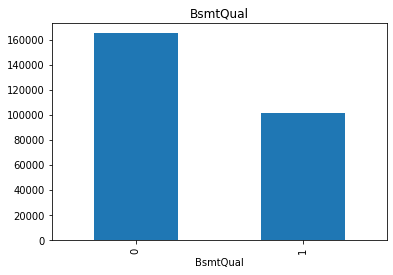

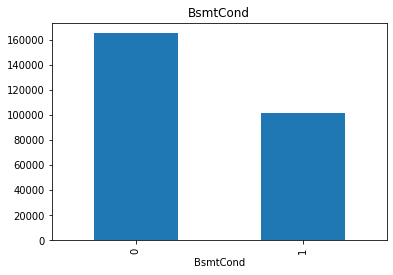

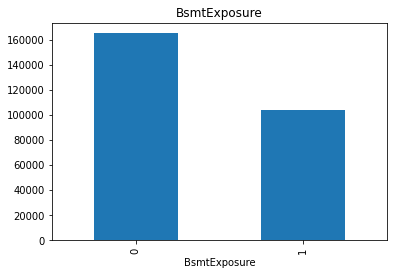

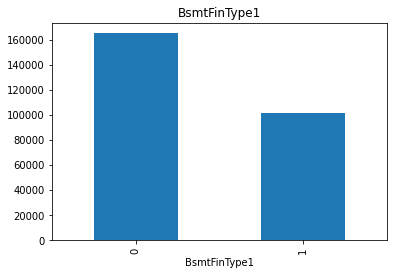

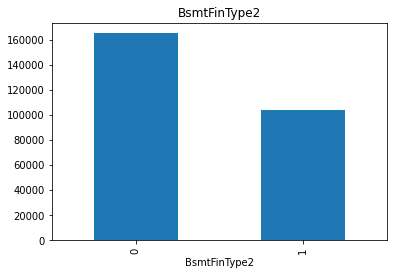

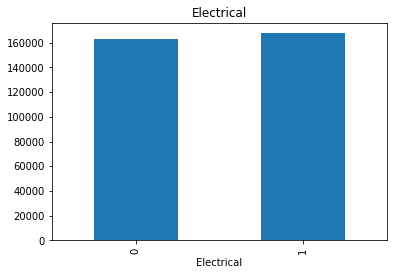

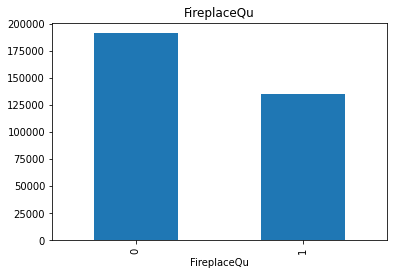

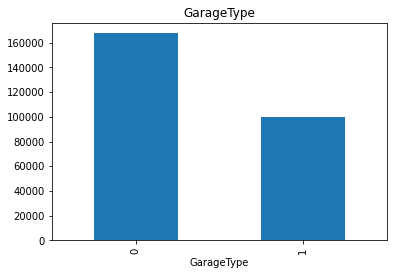

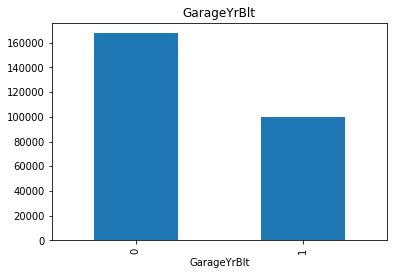

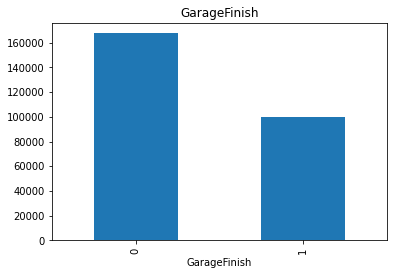

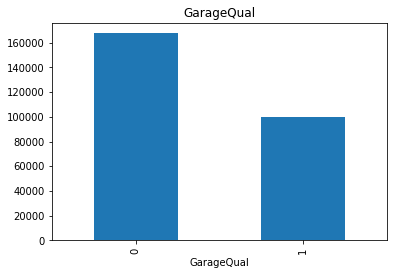

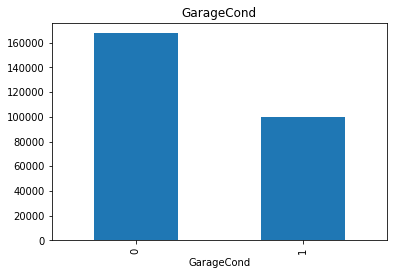

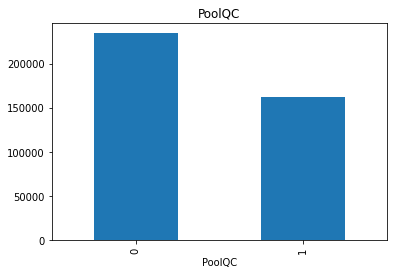

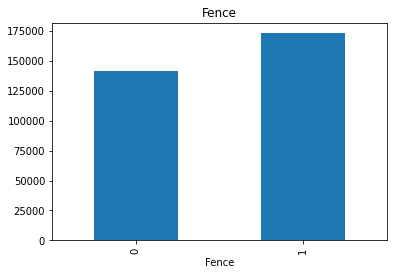

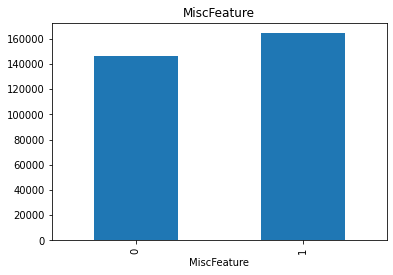

In [5]:
for var in vars_with_na:
    analyse_na_value(data, var)

The average Sale Price in houses where the information is missing, differs from the average Sale Price in houses where information exists.
We will capture this information when we engineer the variables in our next lecture / video.

## Numerical variables
Let's go ahead and find out what numerical variables we have in the dataset

In [6]:
# make list of numerical variables

num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualize the numerical variables
data[num_vars].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


From the above view of the dataset, we notice the variable Id, which is an indicator of the house. We will not use this variable to make our predictions, as there is one different of the variable per each row, i.e., each house in the dataset. See below:

In [7]:
print('Number of House Id labels: ', len(data.Id.unique()))
print('Number of Houses in the Dataset: ', len(data))

Number of House Id labels:  1460
Number of Houses in the Dataset:  1460


## Temporal variables

We have 4 year variables in the dataset:

- YearBuilt: year in which the house was built
- YearRemodAdd: year in which the house was remodeled
- GarageYrBlt: year in which a garage was built
- YrSold: year in which the house was sold

We generally don't use date variables in their raw format instead, we extract information from them. For example, we can capture he fifference in years between the year the hosue was built and the year the house was sold.

In [8]:
# list of variables that contain year information

year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [9]:
# let's explore the values of these temporal variables

for var in year_vars:
    print(var, data[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

As expected, the values are years.
We can explore the evolution of the sale price with the years in which the house was sold:

Text(0.5, 1.0, 'Change in House price with the years')

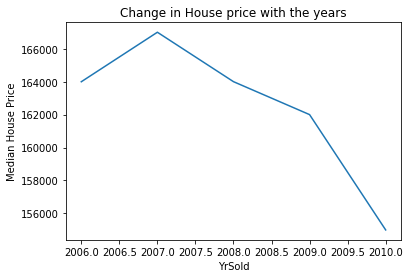

In [10]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')
plt.title('Change in House price with the years')

There has been a drop in the value of the houses. That is unusual, in real life, house prices typically go up as years go by.

Let's go ahead and explore whether there is a relationship between the year variables and SalePrice. For this, we will capture the elapsed years between the Year variables and the year in which the house was sold:

In [11]:
# let's explore the relationship between the tear variables
# and the house price in a bit of more detail:
def analyse_year_vars(df, var):
    df = df.copy()
    
    # capture difference between year varaible and year
    # in which the house was sold 
    df[var] = df['YrSold'] - df[var]
    
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()

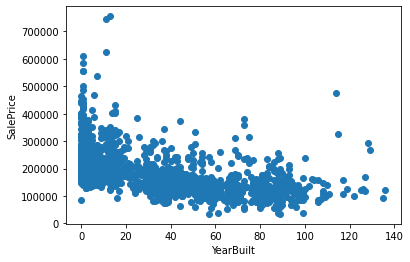

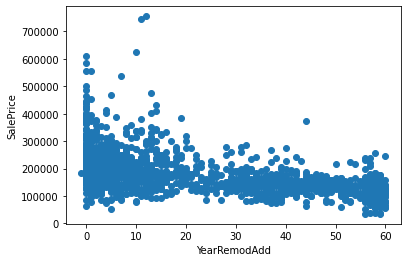

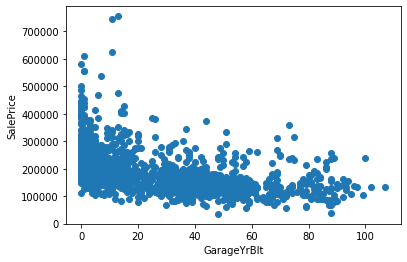

In [12]:
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)

## Discrete variables

Let's go ahead and find which variables are discrete, i.e, show a finite number of values

In [13]:
discrete_vars = [var for var in num_vars if len(data[var].unique()) < 20 and var not in year_vars+['Id']]

discrete_vars

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold']

In [14]:
data[discrete_vars].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12


These discrete variables tend to be qualifications or gradin sales, or refer to the number of rooms, or units.
Let's go ahead and analyse their contribution to the house price.

In [15]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Median SalePrice')
    plt.show()

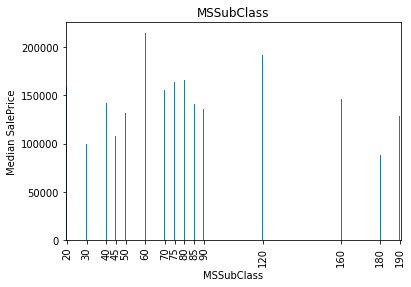

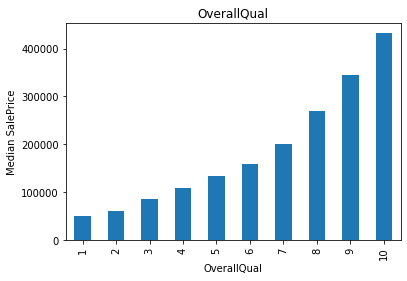

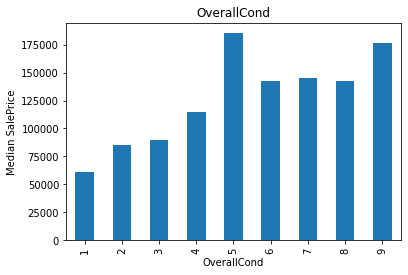

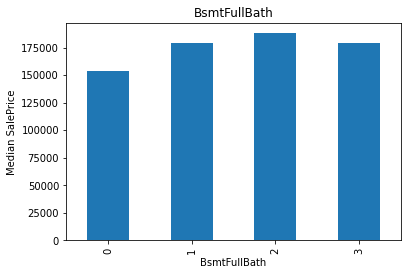

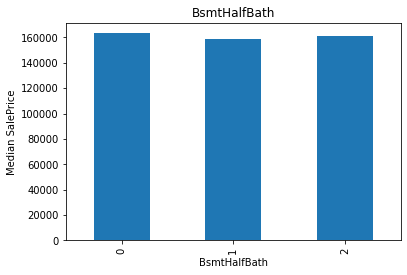

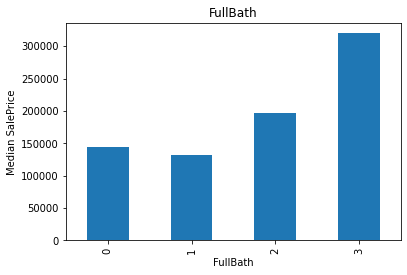

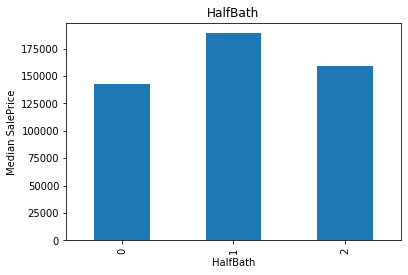

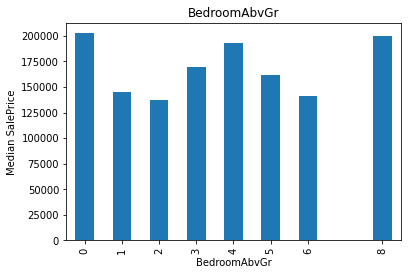

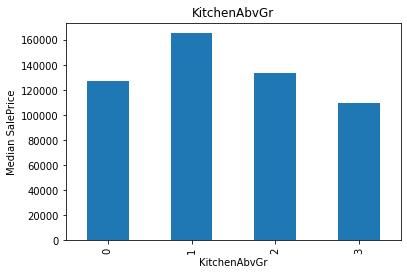

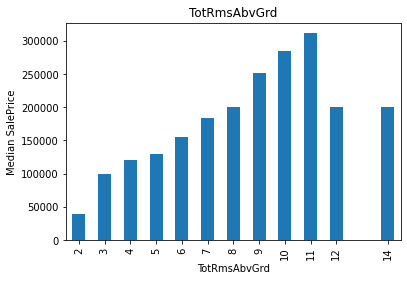

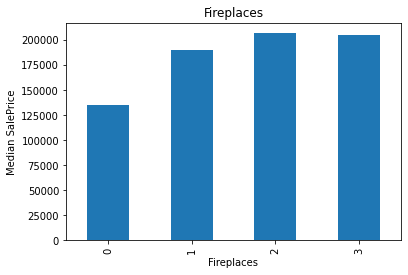

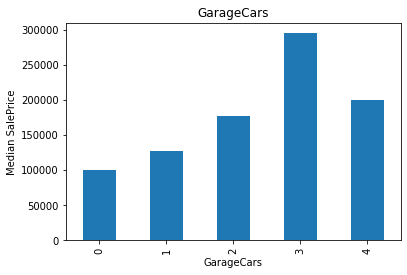

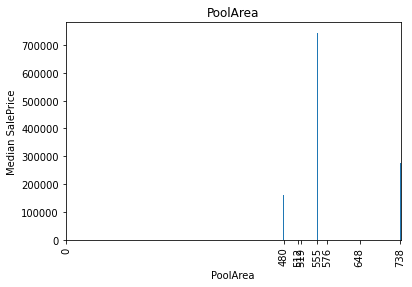

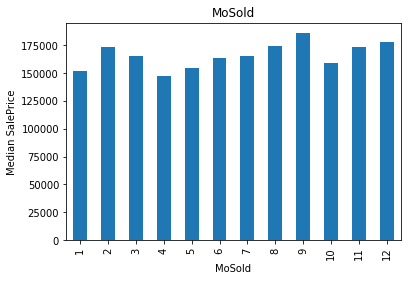

In [16]:
for var in discrete_vars:
    analyse_discrete(data, var)

OverallQuall, is monotinic relationship: the higher the quality , the higher the SalePrice.

However, for OverallCond, the relationship is not monotonic. Clearly, some condition grades, like 5, correlate with higher sale prices, but higher values do not necessarily do so. We need to be careful on how we engineer these variables to extract maximum value for linear model.

To create monotonic relationship between the variable and the ta

## Continuous variables
Let's go ahead and find the distribution o f the continuous variables. We will consider continuous variables to all those that are not temporal or discrete variables in our dataset.

In [17]:
# make list of contiuous variables

cont_vars = [var for var in num_vars if var not in discrete_vars + year_vars + ['Id']]

print('cont_vars')

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']
